## Shek's Guide to EDA House Prices Competition - Kaggle

With 79 explanatory variables describing (almost) every aspect of residential homes in Ames, Iowa, this competition challenges you to predict the final price of each home.

In [1]:
#importing libraries for loading and preprocessing the data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
## Display all the columns of the dataframe
pd.pandas.set_option('display.max_columns',None)

So to kick start EDA, I use this amazing library called Sweetviz. Sweetviz is an open source Python library that generates beautiful, high-density visualizations to kickstart EDA (Exploratory Data Analysis) with a single line of code. Output is a fully self-contained HTML application and my god, is it convinient!

In [2]:
import sweetviz as sv
train_df = pd.read_csv(r'C:\Users\gsabh\Desktop\Kaggle\house-prices-advanced-regression-techniques\train.csv')
test_df = pd.read_csv(r'C:\Users\gsabh\Desktop\Kaggle\house-prices-advanced-regression-techniques\test.csv')

In [3]:
train_df.shape

(1460, 81)

In [4]:
train_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [5]:
test_df.shape

(1459, 80)

In [6]:
test_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,NaN,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,NaN,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,GasA,Gd,Y,SBrkr,928,701,0,1629,0.0,0.0,2,1,3,1,TA,6,Typ,1,TA,Attchd,1997.0,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,6,1998,1998,Gable,CompShg,VinylSd,VinylSd,BrkFace,20.0,TA,TA,PConc,TA,TA,No,GLQ,602.0,Unf,0.0,324.0,926.0,GasA,Ex,Y,SBrkr,926,678,0,1604,0.0,0.0,2,1,3,1,Gd,7,Typ,1,Gd,Attchd,1998.0,Fin,2.0,470.0,TA,TA,Y,360,36,0,0,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,Inside,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8,5,1992,1992,Gable,CompShg,HdBoard,HdBoard,None,0.0,Gd,TA,PConc,Gd,TA,No,ALQ,263.0,Unf,0.0,1017.0,1280.0,GasA,Ex,Y,SBrkr,1280,0,0,1280,0.0,0.0,2,0,2,1,Gd,5,Typ,0,NaN,Attchd,1992.0,RFn,2.0,506.0,TA,TA,Y,0,82,0,0,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


Now lets create those sweet visualizations.

In [7]:
feature_config = sv.FeatureConfig(skip='Id') #skips ID column
train_report = sv.analyze(train_df, target_feat = 'SalePrice', feat_cfg = feature_config, pairwise_analysis = "on")
train_report.show_html() #this opens up an HTML page

:FEATURES DONE:                    |█████████████████████| [100%]   00:22  -> (00:00 left)
:PAIRWISE DONE:                    |█████████████████████| [100%]   00:03  -> (00:00 left)


Creating Associations graph... DONE!
Report SWEETVIZ_REPORT.html was generated! NOTEBOOK/COLAB USERS: no browser will pop up, the report is saved in your notebook/colab files.


One neat trick of sweeviz is that we can compare distinct datasets (train vs test)! 

In [8]:
feature_config = sv.FeatureConfig(skip='Id')
compare_report = sv.compare([train_df, "Training Data"], [test_df, "Test Data"], "SalePrice", feature_config)
compare_report.show_html()

:FEATURES DONE:                    |█████████████████████| [100%]   00:27  -> (00:00 left)
:PAIRWISE DONE:                    |█████████████████████| [100%]   00:07  -> (00:00 left)


Creating Associations graph... DONE!
Report SWEETVIZ_REPORT.html was generated! NOTEBOOK/COLAB USERS: no browser will pop up, the report is saved in your notebook/colab files.


#### Finding out our numerical and categorical columns

In [9]:
numerical = train_df.select_dtypes(exclude='object').columns.to_list()
print("Number of numerical features : ", len(numerical))

categorical = train_df.select_dtypes(include='object').columns.to_list()
print("Number of categorical features: ", len(categorical))

Number of numerical features :  38
Number of categorical features:  43


Let us first concentrate on numerical features. The approach I am going to follow is to narrow my search from the glaringly obvious relations(Well-Duh! things) to the more nuanced realtions(Ah-ha! things).

In [10]:
num_corr = train_df[numerical].corr()
corr_table = num_corr['SalePrice'].sort_values(ascending=False).to_frame().T
corr_table

,SalePrice,OverallQual,GrLivArea,GarageCars,GarageArea,TotalBsmtSF,1stFlrSF,FullBath,TotRmsAbvGrd,YearBuilt,YearRemodAdd,GarageYrBlt,MasVnrArea,Fireplaces,BsmtFinSF1,LotFrontage,WoodDeckSF,2ndFlrSF,OpenPorchSF,HalfBath,LotArea,BsmtFullBath,BsmtUnfSF,BedroomAbvGr,ScreenPorch,PoolArea,MoSold,3SsnPorch,BsmtFinSF2,BsmtHalfBath,MiscVal,Id,LowQualFinSF,YrSold,OverallCond,MSSubClass,EnclosedPorch,KitchenAbvGr
SalePrice,1.0,0.790982,0.708624,0.640409,0.623431,0.613581,0.605852,0.560664,0.533723,0.522897,0.507101,0.486362,0.477493,0.466929,0.38642,0.351799,0.324413,0.319334,0.315856,0.284108,0.263843,0.227122,0.214479,0.168213,0.111447,0.092404,0.046432,0.044584,-0.011378,-0.016844,-0.02119,-0.021917,-0.025606,-0.028923,-0.077856,-0.084284,-0.128578,-0.135907


A lot of things seem obvious looking at this. The things that seem to matter the most are the Overall Quality of the house and quite a few area related features (this will come handy later when we have to engineer new features). Let us take a look at the 10 most corelated features more closely.

<AxesSubplot:>

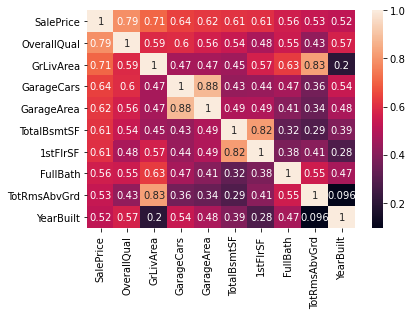

In [11]:
#zoomed in correlation.
f = 10
sns.heatmap(train_df[corr_table.T.index[:f]].corr(), annot=True)

In the remainder of this section, I will visualize the relation between SalePrice and the two predictors with the highest correlation with SalePrice; Overall Quality and the ‘Above Grade’ Living Area (this is the proportion of the house that is not in a basement).

It also becomes clear the multicollinearity is an issue. For example: the correlation between GarageCars and GarageArea is very high (0.88), and both have similar (high) correlations with SalePrice. The other 5 six variables with a correlation higher than 0.5 with SalePrice are: -TotalBsmtSF: Total square feet of basement area -1stFlrSF: First Floor square feet -FullBath: Full bathrooms above grade -TotRmsAbvGrd: Total rooms above grade (does not include bathrooms) -YearBuilt: Original construction date. 

<AxesSubplot:xlabel='OverallQual', ylabel='SalePrice'>

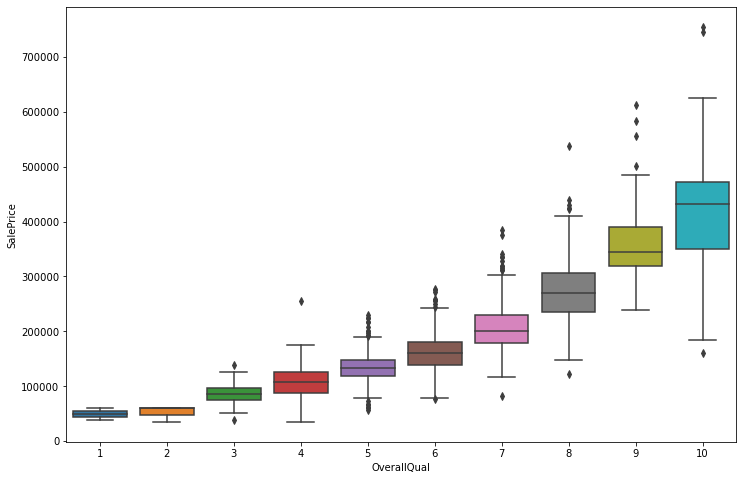

In [12]:
plt.figure(figsize=(12,8))
sns.boxplot(train_df['OverallQual'], train_df['SalePrice'])

The positive correlation is certainly there indeed, and seems to be a slightly upward curve. Regarding outliers, I do not see any extreme values. If there is a candidate to take out as an outlier later on, it seems to be the expensive house with grade 4.

Text(5400, 190000, '1299')

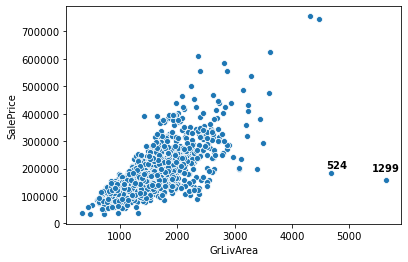

In [13]:
p1 = sns.scatterplot(train_df['GrLivArea'], train_df['SalePrice'])
p1.text(4600, 200000, "524", horizontalalignment='left', size='medium', color='black', weight='semibold')
p1.text(5400, 190000, "1299", horizontalalignment='left', size='medium', color='black', weight='semibold')

Especially the two houses with really big living areas and low SalePrices seem outliers (houses 524 and 1299, see labels in graph). I will not take them out yet, as taking outliers can be dangerous. For instance, a low score on the Overall Quality could explain a low price. However, as you can see below, these two houses actually also score maximum points on Overall Quality. Therefore, I will keep houses 1299 and 524 in mind as prime candidates to take out as outliers.

#### Data Cleaning

Now its time to deal with all the missing values in our train dataset! since we'll also be preprocessing the data, i'll be concatenating train and test sets. Note: Be careful of data leaks! Yikes.

In [14]:
original_train_rows = train_df.shape[0]
original_test_rows = test_df.shape[0]
y_train = train_df['SalePrice'].to_frame()

print('Train shape:', test_df.shape)
combined = pd.concat((train_df, test_df), sort=False).reset_index(drop=True)
combined.shape

Train shape: (1459, 80)


(2919, 81)

In [15]:
#drop the saleprice and ID column as we will not need these for now.
combined.drop(['SalePrice', 'Id'], axis=1, inplace=True)
combined.shape

(2919, 79)

Now moving the focus to missing values. You can either plot them according to the percentage of missing values or just write a function to return a dataframe describing the same. I'll go with the latter

In [16]:
def missing_values_table(df):
    mis_val = df.isnull().sum()
    mis_val_percent = 100 * df.isnull().sum() / len(df)
    mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
    mis_val_table_ren_columns = mis_val_table.rename(columns={
        0: 'Missing Values',
        1: '% of Total Values'
    })
    mis_val_table_ren_columns = mis_val_table_ren_columns[
        mis_val_table_ren_columns.iloc[:, 1] != 0].sort_values(
            '% of Total Values', ascending=False).round(3)
    print("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"
          "There are " + str(mis_val_table_ren_columns.shape[0]) +
          " columns that have missing values.")
    return mis_val_table_ren_columns.T


missing_table = missing_values_table(combined)
missing_table

Your selected dataframe has 79 columns.
There are 34 columns that have missing values.


,PoolQC,MiscFeature,Alley,Fence,FireplaceQu,LotFrontage,GarageFinish,GarageQual,GarageCond,GarageYrBlt,GarageType,BsmtExposure,BsmtCond,BsmtQual,BsmtFinType2,BsmtFinType1,MasVnrType,MasVnrArea,MSZoning,BsmtFullBath,BsmtHalfBath,Functional,Utilities,GarageArea,GarageCars,Electrical,KitchenQual,TotalBsmtSF,BsmtUnfSF,BsmtFinSF2,BsmtFinSF1,Exterior2nd,Exterior1st,SaleType
Missing Values,2909.000,2814.000,2721.000,2348.000,1420.000,486.00,159.000,159.000,159.000,159.000,157.000,82.000,82.000,81.000,80.000,79.000,24.000,23.000,4.000,2.000,2.000,2.000,2.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000
% of Total Values,99.657,96.403,93.217,80.439,48.647,16.65,5.447,5.447,5.447,5.447,5.379,2.809,2.809,2.775,2.741,2.706,0.822,0.788,0.137,0.069,0.069,0.069,0.069,0.034,0.034,0.034,0.034,0.034,0.034,0.034,0.034,0.034,0.034,0.034


#### Imputing Missing Values

In this section, I am going to fix the 34 predictors that contains missing values. I will go through them working my way down from most NAs until I have fixed them all. If I stumble upon a variable that actually forms a group with other variables, I will also deal with them as a group. For instance, there are multiple variables that relate to Pool, Garage, and Basement.<br><br>
Besides making sure that the NAs are taken care off, I have also converted character variables into ordinal integers if there is clear ordinality, or into factors if levels are categories without ordinality. I will convert these factors into numeric later on by using one-hot encoding.

In [17]:
qualities = {'None':0, 'Po':1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex':5}

In [18]:
#First we'll drop columns with more than 70% of data
combined.drop(['PoolQC', 'MiscFeature', 'Alley', 'Fence'], axis=1, inplace=True)
combined.shape

(2919, 75)

In [19]:
#Fireplace quality and number of fireplaces
combined.FireplaceQu.fillna('None', inplace=True)
combined.FireplaceQu = combined.FireplaceQu.map(qualities)

In [20]:
#LotFrontage: Linear feet of street connected to property
#486 NAs. The most reasonable imputation seems to take the median.
combined.LotFrontage.fillna(combined.LotFrontage.median(), inplace=True)
combined.LotShape.map({'IR3':0, 'IR2':1, 'IR1':2, 'Reg':3})

0       3
1       3
2       2
3       2
4       2
       ..
2914    3
2915    3
2916    3
2917    3
2918    3
Name: LotShape, Length: 2919, dtype: int64

In [21]:
combined.LotConfig = pd.factorize(combined.LotConfig)[0]

Altogether, there are 7 variables related to garages

Two of those have one NA (GarageCars and GarageArea), one has 157 NAs (GarageType), 4 variables have 159 NAs.

First of all, I am going to replace all 159 missing GarageYrBlt: Year garage was built values with the values in YearBuilt (this is similar to YearRemodAdd, which also defaults to YearBuilt if no remodeling or additions).

In [22]:
import math
for i, a in enumerate(combined.GarageYrBlt):
    if math.isnan(a):
        combined.loc[i, 'GarageYrBlt'] = combined.YearBuilt.iloc[i]

In [23]:
combined.loc[2127, 'GarageFinish'] = (combined.GarageFinish.mode()[0])
combined.loc[2127, 'GarageCond'] = (combined.GarageCond.mode()[0])
combined.loc[2127, 'GarageQual'] = (combined.GarageQual.mode()[0])

combined.GarageType.fillna('No Garage', inplace=True)
combined.GarageType = pd.factorize(combined.GarageType)[0]

finish_map = {'None':0, 'Unf':1, 'RFn':2, 'Fin':3}

combined.GarageFinish.fillna('None', inplace=True)
combined.GarageFinish = combined.GarageFinish.map(finish_map)

combined.GarageQual.fillna('None', inplace=True)
combined.GarageQual = combined.GarageQual.map(qualities)

combined.GarageCond.fillna('None', inplace=True)
combined.GarageCond = combined.GarageCond.map(qualities)

combined.GarageCars.fillna(0, inplace=True)
combined.GarageArea.fillna(0, inplace=True)

In [30]:
#Basement variables, Altogether, there are 11 variables that relate to the Basement of a house.

combined.BsmtCond.fillna(combined.BsmtCond.mode()[0], inplace=True)
combined.BsmtExposure.fillna(combined.BsmtExposure.mode()[0], inplace=True)
combined.BsmtFinType2.fillna(combined.BsmtFinType2.mode()[0], inplace=True)
combined.BsmtQual.fillna(combined.BsmtQual.mode()[0], inplace=True)

combined.BsmtQual.fillna('None', inplace=True)
combined.BsmtQual = combined.BsmtQual.map(qualities)

combined.BsmtCond.fillna('None', inplace=True)
combined.BsmtCond = combined.BsmtCond.map(qualities)

exposure = {'No':1, 'Mn':2, 'Av':3, 'Gd':4}
#combined.BsmtExposure.fillna('None', inplace=True)
combined.BsmtExposure = combined.BsmtExposure.map(exposure)

fin_type = {'None':0, 'Unf':1, 'LwQ':2, 'Rec':3, 'BLQ':4, 'ALQ':5, 'GLQ':6}
combined.BsmtFinType1.fillna('None', inplace=True)
combined.BsmtFinType1 = combined.BsmtFinType1.map(fin_type)

fin_type_2 = {'Unf':1, 'LwQ':2, 'Rec':3, 'BLQ':4, 'ALQ':5, 'GLQ':6}
#combined.BsmtFinType2.fillna('None', inplace=True)
combined.BsmtFinType2 = combined.BsmtFinType2.map(fin_type_2)

combined.BsmtFullBath.fillna(0, inplace=True)
combined.BsmtHalfBath.fillna(0, inplace=True)
combined.BsmtFinSF1.fillna(0, inplace=True)
combined.BsmtFinSF2.fillna(0, inplace=True)
combined.BsmtUnfSF.fillna(0, inplace=True)
combined.TotalBsmtSF.fillna(0, inplace=True)

In [38]:
#Masonry veneer type has 24 NAs. Masonry veneer area has 23 NAs.
combined.MasVnrType.fillna('None', inplace=True)
masonry = {'None':0, 'BrkCmn':1, 'BrkFace':2, 'Stone':3}
combined.MasVnrType = combined.MasVnrType.map(masonry)

In [39]:
combined.MasVnrType.value_counts(dropna=False)

0    1766
2     879
3     249
1      25
Name: MasVnrType, dtype: int64

In [40]:
combined.MasVnrArea.fillna(0, inplace=True)

#dealing with zoning values
combined.MSZoning.fillna(combined.MSZoning.mode()[0], inplace=True)

combined.KitchenQual.fillna('None', inplace=True)
combined.KitchenQual = combined.KitchenQual.map(qualities)

combined.Utilities.fillna(combined.Utilities.mode()[0], inplace=True)

combined.Functional.fillna(combined.Functional.mode()[0], inplace=True)

combined.Exterior1st.fillna(combined.Exterior1st.mode()[0], inplace=True)

combined.Exterior2nd.fillna(combined.Exterior2nd.mode()[0], inplace=True)

combined.Electrical.fillna(combined.Electrical.mode()[0], inplace=True)

combined.SaleType.fillna(combined.SaleType.mode()[0], inplace=True)

In [49]:
missing_values_table(combined)

Your selected dataframe has 75 columns.
There are 0 columns that have missing values.


""
Missing Values
% of Total Values


In [50]:
combined.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,0,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,2,196.0,Gd,TA,PConc,4,3,1,6,706.0,1,0.0,150.0,856.0,GasA,Ex,Y,SBrkr,856,854,0,1710,1.0,0.0,2,1,3,1,4,8,Typ,0,0,0,2003.0,2,2.0,548.0,3,3,Y,0,61,0,0,0,0,0,2,2008,WD,Normal
1,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,1,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,0,0.0,TA,TA,CBlock,4,3,4,5,978.0,1,0.0,284.0,1262.0,GasA,Ex,Y,SBrkr,1262,0,0,1262,0.0,1.0,2,0,3,1,3,6,Typ,1,3,0,1976.0,2,2.0,460.0,3,3,Y,298,0,0,0,0,0,0,5,2007,WD,Normal
2,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,0,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,2,162.0,Gd,TA,PConc,4,3,2,6,486.0,1,0.0,434.0,920.0,GasA,Ex,Y,SBrkr,920,866,0,1786,1.0,0.0,2,1,3,1,4,6,Typ,1,3,0,2001.0,2,2.0,608.0,3,3,Y,0,42,0,0,0,0,0,9,2008,WD,Normal
3,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,2,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,0,0.0,TA,TA,BrkTil,3,4,1,5,216.0,1,0.0,540.0,756.0,GasA,Gd,Y,SBrkr,961,756,0,1717,1.0,0.0,1,0,3,1,4,7,Typ,1,4,1,1998.0,1,3.0,642.0,3,3,Y,0,35,272,0,0,0,0,2,2006,WD,Abnorml
4,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,1,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,2,350.0,Gd,TA,PConc,4,3,3,6,655.0,1,0.0,490.0,1145.0,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1.0,0.0,2,1,4,1,4,9,Typ,1,3,0,2000.0,2,3.0,836.0,3,3,Y,192,84,0,0,0,0,0,12,2008,WD,Normal


### Label encoding/factorizing the remaining character variables
At this point, I have made sure that all variables with NAs are taken care of. However, I still need to also take care of the remaining character variables that are without missing values.

In [51]:
combined_p = combined.copy()

In [52]:
combined_p.Foundation = pd.factorize(combined_p.Foundation)[0]

combined_p.Heating = pd.factorize(combined_p.Heating)[0]

combined_p.HeatingQC = combined_p.HeatingQC.map(qualities)

combined_p.CentralAir = combined_p.CentralAir.map({'Y':1, 'N':0})

combined_p.RoofStyle = pd.factorize(combined_p.RoofStyle)[0]

combined_p.RoofMatl  = pd.factorize(combined_p.RoofMatl)[0]

combined_p.LandContour   = pd.factorize(combined_p.LandContour)[0]

combined_p.LandSlope = combined_p.LandSlope.map({'Sev':0, 'Mod':1, 'Gtl':2})

In [60]:
combined_p.LandSlope.value_counts()

2    2778
1     125
0      16
Name: LandSlope, dtype: int64

In [61]:
combined_p.BldgType = pd.factorize(combined_p.BldgType)[0]

combined_p.HouseStyle  = pd.factorize(combined_p.HouseStyle )[0]

combined_p.Neighborhood  = pd.factorize(combined_p.Neighborhood)[0]

combined_p.Condition1 = pd.factorize(combined_p.Condition1)[0]

combined_p.Condition2 = pd.factorize(combined_p.Condition2)[0]

combined_p.Street = combined_p.Street.map({'Grvl':0, 'Pave':1})

combined_p.PavedDrive = combined_p.PavedDrive.map({'N':0, 'P':1, 'Y':2})

#### Changing some numeric variables into factors

At this point, all variables are complete (No NAs), and all character variables are converted into either numeric labels of into factors. However, there are 3 variables that are recorded numeric but should actually be categorical.

In [68]:
#Year and Month Sold

In [69]:
combined_p.MoSold = pd.factorize(combined_p.MoSold)[0]

In [70]:
combined_p.MSSubClass  = pd.factorize(combined_p.MSSubClass )[0]

In [71]:
numerical = combined_p.select_dtypes(exclude='object').columns.to_list()
print("Number of numerical features : ", len(numerical))

categorical = combined_p.select_dtypes(include='object').columns.to_list()
print("Number of categorical features: ", len(categorical))

Number of numerical features :  64
Number of categorical features:  11


In [72]:
combined_p.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,0,RL,65.0,8450,1,Reg,0,AllPub,0,2,0,0,0,0,0,7,5,2003,2003,0,0,VinylSd,VinylSd,2,196.0,Gd,TA,0,4,3,1,6,706.0,1,0.0,150.0,856.0,0,5,1,SBrkr,856,854,0,1710,1.0,0.0,2,1,3,1,4,8,Typ,0,0,0,2003.0,2,2.0,548.0,3,3,2,0,61,0,0,0,0,0,0,2008,WD,Normal
1,1,RL,80.0,9600,1,Reg,0,AllPub,1,2,1,1,0,0,1,6,8,1976,1976,0,0,MetalSd,MetalSd,0,0.0,TA,TA,1,4,3,4,5,978.0,1,0.0,284.0,1262.0,0,5,1,SBrkr,1262,0,0,1262,0.0,1.0,2,0,3,1,3,6,Typ,1,3,0,1976.0,2,2.0,460.0,3,3,2,298,0,0,0,0,0,0,1,2007,WD,Normal
2,0,RL,68.0,11250,1,IR1,0,AllPub,0,2,0,0,0,0,0,7,5,2001,2002,0,0,VinylSd,VinylSd,2,162.0,Gd,TA,0,4,3,2,6,486.0,1,0.0,434.0,920.0,0,5,1,SBrkr,920,866,0,1786,1.0,0.0,2,1,3,1,4,6,Typ,1,3,0,2001.0,2,2.0,608.0,3,3,2,0,42,0,0,0,0,0,2,2008,WD,Normal
3,2,RL,60.0,9550,1,IR1,0,AllPub,2,2,2,0,0,0,0,7,5,1915,1970,0,0,Wd Sdng,Wd Shng,0,0.0,TA,TA,2,3,4,1,5,216.0,1,0.0,540.0,756.0,0,4,1,SBrkr,961,756,0,1717,1.0,0.0,1,0,3,1,4,7,Typ,1,4,1,1998.0,1,3.0,642.0,3,3,2,0,35,272,0,0,0,0,0,2006,WD,Abnorml
4,0,RL,84.0,14260,1,IR1,0,AllPub,1,2,3,0,0,0,0,8,5,2000,2000,0,0,VinylSd,VinylSd,2,350.0,Gd,TA,0,4,3,3,6,655.0,1,0.0,490.0,1145.0,0,5,1,SBrkr,1145,1053,0,2198,1.0,0.0,2,1,4,1,4,9,Typ,1,3,0,2000.0,2,3.0,836.0,3,3,2,192,84,0,0,0,0,0,3,2008,WD,Normal


## Feature Engineering

There are 4 bathroom variables. Individually, these variables are not very important. However, I assume that I if I add them up into one predictor, this predictor is likely to become a strong one.

“A half-bath, also known as a powder room or guest bath, has only two of the four main bathroom components-typically a toilet and sink.” Consequently, I will also count the half bathrooms as half.

In [73]:
combined_p['TotBathrooms'] = combined_p['FullBath'] + (combined_p['HalfBath']*0.5) + combined_p['BsmtFullBath'] + (combined_p['BsmtHalfBath'])

Altogether, there are 3 variables that are relevant with regards to the Age of a house; YearBlt, YearRemodAdd, and YearSold. YearRemodAdd defaults to YearBuilt if there has been no Remodeling/Addition. I will use YearRemodeled and YearSold to determine the Age. However, as parts of old constructions will always remain and only parts of the house might have been renovated, I will also introduce a Remodeled Yes/No variable. This should be seen as some sort of penalty parameter that indicates that if the Age is based on a remodeling date, it is probably worth less than houses that were built from scratch in that same year.

In [74]:
combined_p['Remod'] = np.where(combined_p['YearBuilt'] == combined_p['YearRemodAdd'], 0, 1)

combined_p['Age'] = combined_p['YrSold'] - combined_p['YearRemodAdd']

combined_p['IsNew'] = np.where(combined_p['YrSold'] == combined_p['YearBuilt'], 1, 0)

combined_p.YrSold  = pd.factorize(combined_p.YrSold)[0]

combined_p['TotalSqFeet'] = combined_p['GrLivArea'] + combined_p['TotalBsmtSF']

<AxesSubplot:xlabel='TotalSqFeet', ylabel='SalePrice'>

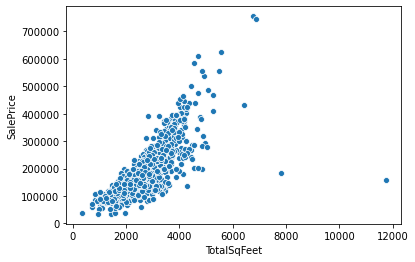

In [79]:
sns.scatterplot(combined_p['TotalSqFeet'], train_df['SalePrice'])

In [80]:
combined_p['TotalPorchSF'] = combined_p['OpenPorchSF'] + combined_p['EnclosedPorch'] + combined_p['3SsnPorch'] + combined_p['ScreenPorch']

In [81]:
combined_p.drop(['YearRemodAdd', 'GarageYrBlt', 'GarageArea', 'GarageCond', 'TotalBsmtSF', 'TotRmsAbvGrd', 'BsmtFinSF1', 'Utilities'], axis=1, inplace=True)

In [82]:
combined_p.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,Functional,Fireplaces,FireplaceQu,GarageType,GarageFinish,GarageCars,GarageQual,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,TotBathrooms,Remod,Age,IsNew,TotalSqFeet,TotalPorchSF
0,0,RL,65.0,8450,1,Reg,0,0,2,0,0,0,0,0,7,5,2003,0,0,VinylSd,VinylSd,2,196.0,Gd,TA,0,4,3,1,6,1,0.0,150.0,0,5,1,SBrkr,856,854,0,1710,1.0,0.0,2,1,3,1,4,Typ,0,0,0,2,2.0,3,2,0,61,0,0,0,0,0,0,0,WD,Normal,3.5,0,5,0,2566.0,61
1,1,RL,80.0,9600,1,Reg,0,1,2,1,1,0,0,1,6,8,1976,0,0,MetalSd,MetalSd,0,0.0,TA,TA,1,4,3,4,5,1,0.0,284.0,0,5,1,SBrkr,1262,0,0,1262,0.0,1.0,2,0,3,1,3,Typ,1,3,0,2,2.0,3,2,298,0,0,0,0,0,0,1,1,WD,Normal,3.0,0,31,0,2524.0,0
2,0,RL,68.0,11250,1,IR1,0,0,2,0,0,0,0,0,7,5,2001,0,0,VinylSd,VinylSd,2,162.0,Gd,TA,0,4,3,2,6,1,0.0,434.0,0,5,1,SBrkr,920,866,0,1786,1.0,0.0,2,1,3,1,4,Typ,1,3,0,2,2.0,3,2,0,42,0,0,0,0,0,2,0,WD,Normal,3.5,1,6,0,2706.0,42
3,2,RL,60.0,9550,1,IR1,0,2,2,2,0,0,0,0,7,5,1915,0,0,Wd Sdng,Wd Shng,0,0.0,TA,TA,2,3,4,1,5,1,0.0,540.0,0,4,1,SBrkr,961,756,0,1717,1.0,0.0,1,0,3,1,4,Typ,1,4,1,1,3.0,3,2,0,35,272,0,0,0,0,0,2,WD,Abnorml,2.0,1,36,0,2473.0,307
4,0,RL,84.0,14260,1,IR1,0,1,2,3,0,0,0,0,8,5,2000,0,0,VinylSd,VinylSd,2,350.0,Gd,TA,0,4,3,3,6,1,0.0,490.0,0,5,1,SBrkr,1145,1053,0,2198,1.0,0.0,2,1,4,1,4,Typ,1,3,0,2,3.0,3,2,192,84,0,0,0,0,0,3,0,WD,Normal,3.5,0,8,0,3343.0,84


In [83]:
missing_values_table(combined_p)

Your selected dataframe has 73 columns.
There are 0 columns that have missing values.


""
Missing Values
% of Total Values


In [84]:
combined_p.loc[combined_p['TotalSqFeet'] > 7600, :]

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,Functional,Fireplaces,FireplaceQu,GarageType,GarageFinish,GarageCars,GarageQual,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,TotBathrooms,Remod,Age,IsNew,TotalSqFeet,TotalPorchSF
523,0,RL,130.0,40094,1,IR1,1,0,2,15,2,4,0,0,10,5,2007,1,0,CemntBd,CmentBd,3,762.0,Ex,TA,0,5,3,4,6,1,0.0,878.0,0,5,1,SBrkr,3138,1538,0,4676,1.0,0.0,3,1,3,1,5,Typ,1,4,2,3,3.0,3,2,208,406,0,0,0,0,0,4,1,New,Partial,4.5,1,-1,1,7814.0,406
1298,0,RL,313.0,63887,1,IR3,1,2,2,15,1,0,0,0,10,5,2008,1,7,Stucco,Stucco,3,796.0,Ex,TA,0,5,3,4,6,1,0.0,466.0,0,5,1,SBrkr,4692,950,0,5642,2.0,0.0,2,1,3,1,5,Typ,3,4,0,3,2.0,3,2,214,292,0,0,0,480,0,8,0,New,Partial,4.5,0,0,1,11752.0,292
2549,1,RL,128.0,39290,1,IR1,1,0,2,15,0,0,0,1,10,5,2008,1,0,CemntBd,CmentBd,3,1224.0,Ex,TA,0,5,3,4,6,1,0.0,1085.0,0,5,1,SBrkr,5095,0,0,5095,1.0,1.0,2,1,2,1,5,Typ,2,4,0,3,3.0,3,2,546,484,0,0,0,0,17000,4,1,New,Partial,4.5,1,-2,0,10190.0,484


<AxesSubplot:xlabel='SaleCondition', ylabel='SalePrice'>

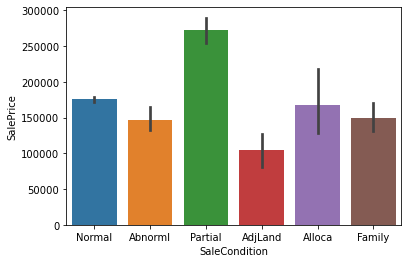

In [85]:
sns.barplot(combined_p['SaleCondition'], train_df['SalePrice'])

In [86]:
combined_p.MSZoning  = pd.factorize(combined_p.MSZoning)[0]

combined_p.LotShape = combined_p.LotShape.map({'Reg':1, 'IR1':2, 'IR2':3, 'IR3':4})

combined_p.Exterior1st  = pd.factorize(combined_p.Exterior1st)[0]

combined_p.Exterior2nd  = pd.factorize(combined_p.Exterior2nd)[0]

combined_p.ExterQual = combined_p.ExterQual.map(qualities)

combined_p.ExterCond = combined_p.ExterCond.map(qualities)

combined_p.Electrical  = pd.factorize(combined_p.Electrical)[0]

combined_p.Functional  = pd.factorize(combined_p.Functional)[0]

combined_p.SaleType  = pd.factorize(combined_p.SaleType)[0]

combined_p.SaleCondition  = pd.factorize(combined_p.SaleCondition)[0]

In [96]:
combined_p.tail()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,Functional,Fireplaces,FireplaceQu,GarageType,GarageFinish,GarageCars,GarageQual,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,TotBathrooms,Remod,Age,IsNew,TotalSqFeet,TotalPorchSF
2914,11,1,21.0,1936,1,1,0,0,2,14,0,0,4,0,4,7,1970,0,0,6,6,0,0.0,3,3,1,3,3,1,1,1,0.0,546.0,0,4,1,0,546,546,0,1092,0.0,0.0,1,1,3,1,3,0,0,0,4,0,0.0,0,2,0,0,0,0,0,0,0,11,2,0,0,1.5,0,36,0,1638.0,0
2915,11,1,21.0,1894,1,1,0,0,2,14,0,0,3,0,4,5,1970,0,0,6,6,0,0.0,3,3,1,3,3,1,3,1,0.0,294.0,0,3,1,0,546,546,0,1092,0.0,0.0,1,1,3,1,3,0,0,0,3,1,1.0,3,2,0,24,0,0,0,0,0,7,2,0,1,1.5,0,36,0,1638.0,24
2916,1,0,160.0,20000,1,1,0,0,2,4,0,0,0,1,5,7,1960,0,0,0,0,0,0.0,3,3,1,3,3,1,5,1,0.0,0.0,0,5,1,0,1224,0,0,1224,1.0,0.0,1,0,4,1,3,0,1,3,1,1,2.0,3,2,474,0,0,0,0,0,0,2,2,0,1,2.0,1,10,0,2448.0,0
2917,9,0,62.0,10441,1,1,0,0,2,4,0,0,0,4,5,5,1992,0,0,3,2,0,0.0,3,3,0,4,3,3,6,1,0.0,575.0,0,3,1,0,970,0,0,970,0.0,1.0,1,0,3,1,3,0,0,0,4,0,0.0,0,2,80,32,0,0,0,0,700,9,2,0,0,2.0,0,14,0,1882.0,32
2918,0,0,74.0,9627,1,1,0,0,1,4,0,0,0,0,7,5,1993,0,0,3,3,2,94.0,3,3,0,4,3,3,2,1,0.0,238.0,0,5,1,0,996,1004,0,2000,0.0,0.0,2,1,3,1,3,0,1,3,0,3,3.0,3,2,190,48,0,0,0,0,0,6,2,0,0,2.5,1,12,0,2996.0,48


In [97]:
combined_p.shape

(2919, 73)

# Preparing data for modeling

First of all, I am dropping a variable if two variables are highly correlated. To find these correlated pairs, I have used the correlations matrix again. For instance: GarageCars and GarageArea have a correlation of 0.89. Of those two, I am dropping the variable with the lowest correlation with SalePrice (which is GarageArea with a SalePrice correlation of 0.62. GarageCars has a SalePrice correlation of 0.64). Secondly, remove any outliers we've identified.

In [98]:
#Removing outliers
combined_p['SalePrice'] = train_df['SalePrice']
combined_p.drop(combined_p.index[[523,1298]], inplace=True)
combined_p = combined_p.reset_index()

In [99]:
numeric_data = combined_p[['LotFrontage','LotArea','YearBuilt','MasVnrArea','BsmtFinSF2', 'BsmtUnfSF', '1stFlrSF',
                          '2ndFlrSF','LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
                           'BedroomAbvGr', 'KitchenAbvGr','Fireplaces', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', 
                           '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'TotBathrooms', 'Age', 
                           'TotalSqFeet', 'TotalPorchSF']]

In [100]:
factor_data = pd.DataFrame()
for col in combined_p:
    if col not in numeric_data.columns:
        factor_data[col] = combined_p[col]

In [101]:
factor_data.shape

(2917, 47)

In [102]:
price = np.log1p(factor_data.SalePrice)

In [103]:
factor_data.drop(['SalePrice'], axis=1, inplace=True)

In [104]:
#Skewness and normalizing of the numeric predictors
for col in numeric_data.columns:
    if abs(numeric_data.loc[:, col].skew())>0.8:
        numeric_data.loc[:, col] = np.log1p(numeric_data.loc[:, col])

C:\Users\gsabh\AppData\Roaming\Python\Python37\site-packages\pandas\core\indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [105]:
#Normalize the data
from sklearn import preprocessing
numeric_data = preprocessing.normalize(numeric_data)

In [106]:
numeric_data = pd.DataFrame(numeric_data, columns=['LotFrontage','LotArea','YearBuilt','MasVnrArea','BsmtFinSF2', 'BsmtUnfSF', '1stFlrSF',
                          '2ndFlrSF','LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
                           'BedroomAbvGr', 'KitchenAbvGr','Fireplaces', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', 
                           '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'TotBathrooms', 'Age', 
                           'TotalSqFeet', 'TotalPorchSF'])

In [107]:
dummy_data = pd.DataFrame()
for col in factor_data.columns:
    dummy = pd.get_dummies(factor_data[col], prefix=col)
    dummy_data = pd.concat([dummy_data, dummy], axis=1)

In [108]:
dummy_data.shape

(2917, 3216)

In [109]:
dummy_data.head()

index_0  index_1  index_2  index_3  index_4  index_5  index_6  index_7  \
0        1        0        0        0        0        0        0        0   
1        0        1        0        0        0        0        0        0   
2        0        0        1        0        0        0        0        0   
3        0        0        0        1        0        0        0        0   
4        0        0        0        0        1        0        0        0   

   index_8  index_9  index_10  index_11  index_12  index_13  index_14  \
0        0        0         0         0         0         0         0   
1        0        0         0         0         0         0         0   
2        0        0         0         0         0         0         0   
3        0        0         0         0         0         0         0   
4        0        0         0         0         0         0         0   

   index_15  index_16  index_17  index_18  index_19  index_20  index_21  \
0         0         0         0         0         0         0         0   
1         0         0         0         0         0         0         0   
2         0         0         0         0         0         0         0   
3         0         0         0         0         0         0         0   
4         0         0         0         0         0         0         0   

   index_22  index_23  index_24  index_25  index_26  index_27  index_28  \
0         0         0         0         0         0         0         0   
1         0         0         0         0         0         0         0   
2         0         0         0         0         0         0         0   
3         0         0         0         0         0         0         0   
4         0         0         0         0         0         0         0   

   index_29  index_30  index_31  index_32  index_33  index_34  index_35  \
0         0         0         0         0         0         0         0   
1         0         0         0         0         0         0         0   
2         0         0         0         0         0         0         0   
3         0         0         0         0         0         0         0   
4         0         0         0         0         0         0         0   

   index_36  index_37  index_38  index_39  index_40  index_41  index_42  \
0         0         0         0         0         0         0         0   
1         0         0         0         0         0         0         0   
2         0         0         0         0         0         0         0   
3         0         0         0         0         0         0         0   
4         0         0         0         0         0         0         0   

   index_43  index_44  index_45  index_46  index_47  index_48  index_49  \
0         0         0         0         0         0         0         0   
1         0         0         0         0         0         0         0   
2         0         0         0         0         0         0         0   
3         0         0         0         0         0         0         0   
4         0         0         0         0         0         0         0   

   index_50  index_51  index_52  index_53  index_54  index_55  index_56  \
0         0         0         0         0         0         0         0   
1         0         0         0         0         0         0         0   
2         0         0         0         0         0         0         0   
3         0         0         0         0         0         0         0   
4         0         0         0         0         0         0         0   

   index_57  index_58  index_59  index_60  index_61  index_62  index_63  \
0         0         0         0         0         0         0         0   
1         0         0         0         0         0         0         0   
2         0         0         0         0         0         0         0   
3         0         0         0         0         0         0         0   
4         0         

In [110]:
numeric_data.head()

,LotFrontage,LotArea,YearBuilt,MasVnrArea,BsmtFinSF2,BsmtUnfSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,Fireplaces,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,TotBathrooms,Age,TotalSqFeet,TotalPorchSF
0,0.002092,0.004514,0.999944,0.002637,0.0,0.002505,0.003371,0.003370,0.0,0.003717,0.000499,0.000000,0.000998,0.000499,0.001498,0.000346,0.000000,0.000000,0.002060,0.000000,0.0,0.0,0.0,0.0,0.001747,0.002496,0.003919,0.002060
1,0.002224,0.004640,0.999832,0.000000,0.0,0.002860,0.003613,0.000000,0.0,0.003613,0.000000,0.000351,0.001012,0.000000,0.001518,0.000351,0.000506,0.002884,0.000000,0.000000,0.0,0.0,0.0,0.0,0.001518,0.015686,0.003964,0.000000
2,0.002116,0.004662,0.999941,0.002545,0.0,0.003036,0.003411,0.003381,0.0,0.003742,0.000500,0.000000,0.000999,0.000500,0.001499,0.000346,0.000500,0.000000,0.001880,0.000000,0.0,0.0,0.0,0.0,0.001749,0.002998,0.003950,0.001880
3,0.002146,0.004784,0.999763,0.000000,0.0,0.003286,0.003586,0.003461,0.0,0.003889,0.000522,0.000000,0.000522,0.000000,0.001566,0.000362,0.000522,0.000000,0.001871,0.002929,0.0,0.0,0.0,0.0,0.001044,0.018795,0.004079,0.002992
4,0.002221,0.004782,0.999928,0.002930,0.0,0.003098,0.003522,0.003480,0.0,0.003848,0.000500,0.000000,0.001000,0.000500,0.002000,0.000347,0.000500,0.002631,0.002221,0.000000,0.0,0.0,0.0,0.0,0.001750,0.004000,0.004057,0.002221


In [111]:
for col in dummy_data.columns:
    if dummy_data[col].sum(axis=0)<10:
        dummy_data.drop([col], axis=1, inplace=True)

In [112]:
dummy_data.shape

(2917, 251)

In [113]:
numeric_data.shape

(2917, 28)

In [114]:
final = pd.concat([numeric_data, dummy_data], axis=1)
final.shape

(2917, 279)

In [115]:
final.head()

,LotFrontage,LotArea,YearBuilt,MasVnrArea,BsmtFinSF2,BsmtUnfSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,Fireplaces,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,TotBathrooms,Age,TotalSqFeet,TotalPorchSF,MSSubClass_0,MSSubClass_1,MSSubClass_2,MSSubClass_3,MSSubClass_4,MSSubClass_5,MSSubClass_6,MSSubClass_7,MSSubClass_8,MSSubClass_9,MSSubClass_10,MSSubClass_11,MSSubClass_12,MSSubClass_13,MSZoning_0,MSZoning_1,MSZoning_2,MSZoning_3,MSZoning_4,Street_0,Street_1,LotShape_1,LotShape_2,LotShape_3,LotShape_4,LandContour_0,LandContour_1,LandContour_2,LandContour_3,LotConfig_0,LotConfig_1,LotConfig_2,LotConfig_3,LotConfig_4,LandSlope_0,LandSlope_1,LandSlope_2,Neighborhood_0,Neighborhood_1,Neighborhood_2,Neighborhood_3,Neighborhood_4,Neighborhood_5,Neighborhood_6,Neighborhood_7,Neighborhood_8,Neighborhood_9,Neighborhood_10,Neighborhood_11,Neighborhood_12,Neighborhood_13,Neighborhood_14,Neighborhood_15,Neighborhood_16,Neighborhood_17,Neighborhood_18,Neighborhood_19,Neighborhood_20,Neighborhood_21,Neighborhood_22,Neighborhood_23,Neighborhood_24,Condition1_0,Condition1_1,Condition1_2,Condition1_3,Condition1_4,Condition1_6,Condition1_7,Condition2_0,Condition2_3,BldgType_0,BldgType_1,BldgType_2,BldgType_3,BldgType_4,HouseStyle_0,HouseStyle_1,HouseStyle_2,HouseStyle_3,HouseStyle_4,HouseStyle_5,HouseStyle_6,OverallQual_2,OverallQual_3,OverallQual_4,OverallQual_5,OverallQual_6,OverallQual_7,OverallQual_8,OverallQual_9,OverallQual_10,OverallCond_2,OverallCond_3,OverallCond_4,OverallCond_5,OverallCond_6,OverallCond_7,OverallCond_8,OverallCond_9,RoofStyle_0,RoofStyle_1,RoofStyle_2,RoofStyle_3,RoofStyle_4,RoofMatl_0,RoofMatl_5,Exterior1st_0,Exterior1st_1,Exterior1st_2,Exterior1st_3,Exterior1st_4,Exterior1st_5,Exterior1st_6,Exterior1st_7,Exterior1st_8,Exterior1st_9,Exterior2nd_0,Exterior2nd_1,Exterior2nd_2,Exterior2nd_3,Exterior2nd_4,Exterior2nd_5,Exterior2nd_6,Exterior2nd_7,Exterior2nd_8,Exterior2nd_9,Exterior2nd_10,Exterior2nd_11,MasVnrType_0,MasVnrType_1,MasVnrType_2,MasVnrType_3,ExterQual_2,ExterQual_3,ExterQual_4,ExterQual_5,ExterCond_2,ExterCond_3,ExterCond_4,ExterCond_5,Foundation_0,Foundation_1,Foundation_2,Foundation_4,Foundation_5,BsmtQual_2,BsmtQual_3,BsmtQual_4,BsmtQual_5,BsmtCond_2,BsmtCond_3,BsmtCond_4,BsmtExposure_1,BsmtExposure_2,BsmtExposure_3,BsmtExposure_4,BsmtFinType1_0,BsmtFinType1_1,BsmtFinType1_2,BsmtFinType1_3,BsmtFinType1_4,BsmtFinType1_5,BsmtFinType1_6,BsmtFinType2_1,BsmtFinType2_2,BsmtFinType2_3,BsmtFinType2_4,BsmtFinType2_5,BsmtFinType2_6,Heating_0,Heating_1,HeatingQC_2,HeatingQC_3,HeatingQC_4,HeatingQC_5,CentralAir_0,CentralAir_1,Electrical_0,Electrical_1,Electrical_2,KitchenQual_2,KitchenQual_3,KitchenQual_4,KitchenQual_5,Functional_0,Functional_1,Functional_2,Functional_3,Functional_4,FireplaceQu_0,FireplaceQu_1,FireplaceQu_2,FireplaceQu_3,FireplaceQu_4,FireplaceQu_5,GarageType_0,GarageType_1,GarageType_2,GarageType_3,GarageType_4,GarageType_5,GarageType_6,GarageFinish_0,GarageFinish_1,GarageFinish_2,GarageFinish_3,GarageCars_0.0,GarageCars_1.0,GarageCars_2.0,GarageCars_3.0,GarageCars_4.0,GarageQual_0,GarageQual_2,GarageQual_3,GarageQual_4,PavedDrive_0,PavedDrive_1,PavedDrive_2,MoSold_0,MoSold_1,MoSold_2,MoSold_3,MoSold_4,MoSold_5,MoSold_6,MoSold_7,MoSold_8,MoSold_9,MoSold_10,MoSold_11,YrSold_0,YrSold_1,YrSold_2,YrSold_3,YrSold_4,SaleType_0,SaleType_1,SaleType_2,SaleType_3,SaleType_5,SaleCondition_0,SaleCondition_1,SaleCondition_2,SaleCondition_3,SaleCondition_4,SaleCondition_5,Remod_0,Remod_1,IsNew_0,IsNew_1
0,0.002092,0.004514,0.999944,0.002637,0.0,0.002505,0.003371,0.003370,0.0,0.003717,0.000499,0.000000,0.000998,0.000499,0.001498,0.000346,0.000000,0.000000,0.002060,0.000000,0.0,0.0,0.0,0.0,0.001747,0.002496,0.003919,0.002060,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,

In [116]:
train_final = final.iloc[:1458,:]
test_final = final.iloc[1458:, :]

In [117]:
train_final.shape

(1458, 279)

In [118]:
test_final.shape

(1459, 279)

In [119]:
price = pd.Series(price[:1458], name='SalePrice')

In [120]:
#train_final = pd.concat([train_final, price], axis=1)

In [121]:
train_final.shape

(1458, 279)

# Modeling :)

I'm going with lasso first since we can find out which of our features are important and which we can safely remove.

In [124]:
from sklearn.linear_model import Lasso
las_clf = Lasso(alpha=0.01)
las_clf.fit(train_final, price)

Lasso(alpha=0.01, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

In [125]:
y_pred = las_clf.predict(test_final)
y_pred

array([11.67044116, 11.85637359, 12.16778567, ..., 11.93065711,
       11.79305146, 12.34848172])

In [127]:
from sklearn import ensemble
gb_classifier = ensemble.GradientBoostingRegressor()

In [128]:
gb_classifier2 = ensemble.GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.05, loss='ls', max_depth=2, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=1500, n_iter_no_change=None, presort='auto',
             random_state=None, subsample=1.0, tol=0.0001,
             validation_fraction=0.1, verbose=0, warm_start=False)

In [129]:
gb_classifier2.fit(train_final, price)
gb_pred = gb_classifier2.predict(test_final)

In [130]:
y_pred = np.expm1(gb_pred) # opposite of taking np.log1p
pred = pd.DataFrame(y_pred)
sub_df = pd.read_csv(r'C:\Users\gsabh\Desktop\Kaggle\house-prices-advanced-regression-techniques\sample_submission.csv')
datasets = pd.concat([sub_df['Id'], pred], axis=1)
datasets.columns=['Id', 'SalePrice']
datasets.to_csv('sample_submission.csv', index = False)

Final score : 0.12636
Leaderboard ranking: 1295 (23%)

I've tried just these two models. Please feel free to experiment with the others. Also, a quick suggestion, try to first build a baseline model by filling the NAs with just the mean or mode of respective columns. I have also skipped the process of hyper-parameter tuning. I think I could have increased the score by a little. My intuition tells me, feature selection and feature engineering is where you will get the most bang for the buck. Good Luck! :)